In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
#from utility import check_columns


# Import .csv
file = 'Resources/Working_Population_Pct.csv'
file_df = pd.read_csv(file, index_col=False)
file_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WKGPOP,TOT,PC_POP,A,2009,67.505,NaN
1,AUS,WKGPOP,TOT,PC_POP,A,2010,67.386,NaN
2,AUS,WKGPOP,TOT,PC_POP,A,2011,67.226,NaN
3,AUS,WKGPOP,TOT,PC_POP,A,2012,66.930,NaN
4,AUS,WKGPOP,TOT,PC_POP,A,2013,66.671,NaN


In [3]:
country_df=file_df.replace({'LOCATION': {'AUS':'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 
                             'CAN': 'Canada', 'CZE': 'Czech Republic', 'DNK': 'Denmark',
                             'FIN': 'Finland', 'FRA': 'France',  'DEU': 'Germany',                           
                             'GRC': 'Greece', 'HUN': 'Hungary',  'ISL': 'Iceland',
                             'IRL': 'Ireland', 'ITA': 'Italy', 'JPN': 'Japan',
                             'KOR': 'Korea','LUX': 'Luxembourg', 'MEX': 'Mexico', 
                             'NLD': 'Netherlands',  'NZL': 'New Zealand', 'NOR': 'Norway',
                             'POL': 'Poland','PRT': 'Portugal','SVK': 'Slovak Republic',
                             'SVN': 'Slovenia','ESP': 'Spain','SWE': 'Sweden', 'GBR': 'United Kingdom',
                             'TUR': 'Turkey',  'USA': 'United States','CHE': 'Sitzerland',
                             'CHL': 'Chile', 'EST': 'Estonia','ISR': 'Israel',
                             'LVA': 'Latvia', 'LTU': 'Lithuania'}
                            })

country_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,Australia,WKGPOP,TOT,PC_POP,A,2009,67.505,NaN
1,Australia,WKGPOP,TOT,PC_POP,A,2010,67.386,NaN
2,Australia,WKGPOP,TOT,PC_POP,A,2011,67.226,NaN
3,Australia,WKGPOP,TOT,PC_POP,A,2012,66.930,NaN
4,Australia,WKGPOP,TOT,PC_POP,A,2013,66.671,NaN


In [4]:
country_list=['Australia','Austria', 'Belgium', 'Canada', 'Czech Republic', 'Denmark',
            'Finland', 'France', 'Germany', 'Greece', 'Hungary','Iceland',
            'Ireland', 'Italy', 'Japan','Korea','Luxembourg','Mexico', 
            'Netherlands', 'New Zealand', 'Norway','Poland', 'Portugal','Slovak Republic',
            'Slovenia', 'Spain','Sweden', 'United Kingdom',
            'Turkey', 'United States','Sitzerland',
            'Chile','Estonia', 'Israel','Latvia', 'Lithuania']
            

In [5]:
clean_df=country_df[country_df['LOCATION'].isin(country_list)]
clean_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,Australia,WKGPOP,TOT,PC_POP,A,2009,67.505,NaN
1,Australia,WKGPOP,TOT,PC_POP,A,2010,67.386,NaN
2,Australia,WKGPOP,TOT,PC_POP,A,2011,67.226,NaN
3,Australia,WKGPOP,TOT,PC_POP,A,2012,66.930,NaN
4,Australia,WKGPOP,TOT,PC_POP,A,2013,66.671,NaN


In [6]:
clean_df['LOCATION'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Sitzerland',
       'Turkey', 'United Kingdom', 'United States', 'Chile', 'Estonia',
       'Israel', 'Slovenia', 'Latvia', 'Lithuania'], dtype=object)

In [7]:
working_df=clean_df[['LOCATION','Value']]
#working_df.head()
working_df.rename(columns={'LOCATION': 'Country', 'Value': 'WF'}, inplace=True)
working_df.head()

C:\Users\Elizabeth Conway\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country,WF
0,Australia,67.505
1,Australia,67.386
2,Australia,67.226
3,Australia,66.930
4,Australia,66.671


In [8]:
working_df['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Sitzerland',
       'Turkey', 'United Kingdom', 'United States', 'Chile', 'Estonia',
       'Israel', 'Slovenia', 'Latvia', 'Lithuania'], dtype=object)

In [9]:
#working_df.

group_df=(working_df.groupby(['Country'])).mean()
group_df.head()

,WF
Country,
Australia,66.5498
Austria,67.3097
Belgium,65.1445
Canada,68.2227
Chile,68.7144


<AxesSubplot:xlabel='Country'>

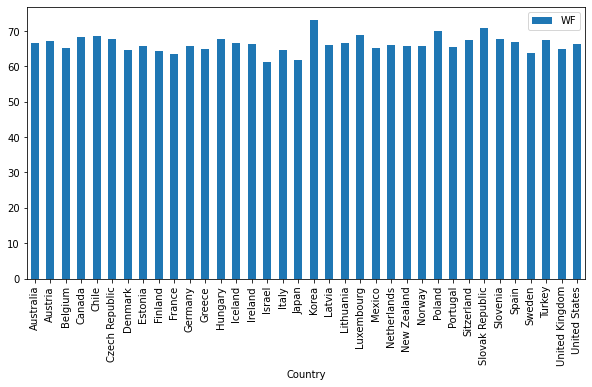

In [10]:
group_df.plot(kind='bar',figsize=(10,5))

In [11]:
west = ['United Kingdom', 'Spain', 'Austria', 'France', 'Germany', 'Ireland', 'Switzerland', 'Italy', 'Luxembourg', 'Greece', 'Israel'
                 'Netherlands', 'Belgium', 'Australia', 'New Zealand', 'Portugal', 'Turkey', 'Canada']
east =  ['Estonia', 'Czech Republic', 'Latvia', 'Lithuania', 'Hungary', 'Slovak Republic', 'Slovenia', 'Poland'] 
scandinavian = ['Norway', 'Finland' ,'Iceland', 'Sweden', 'Denmark']
us = ['United States']
asia = ['Korea', 'Japan']
latin = ['Mexico', 'Chile']

In [12]:
west_df = pd.DataFrame({"Country": west})
east_df = pd.DataFrame({"Country": east})
scand_df = pd.DataFrame({"Country": scandinavian})
us_df = pd.DataFrame({"Country": us})
asia_df = pd.DataFrame({"Country": asia})
latin_df = pd.DataFrame({"Country": latin})

In [17]:
west_filter = pd.merge(group_df, west_df, on=["Country"])
east_filter = pd.merge(group_df, east_df, on=["Country"])
scand_filter = pd.merge(group_df, scand_df, on=["Country"])
us_filter = pd.merge(group_df, us_df, on=["Country"])
asia_filter = pd.merge(group_df, asia_df, on=["Country"])
latin_filter = pd.merge(group_df, latin_df, on=["Country"])

region_df =pd.DataFrame({
    "west": {"df": west_filter},
    "east": {"df": east_filter},
    "scand": {"df":scand_filter},
    "us": {"df":us_filter},
    "asia": {"df":asia_filter},
    "latin": {"df":latin_filter}
})

#region_df.head()


#chart_mean=[west_filter.mean(),east_filter.mean(),scand_filter.mean(),us_filter.mean(),asia_filter.mean(),latin_filter.mean()]
fine= {'Western Europe': west_filter.mean(),
    'Eastern Europe': east_filter.mean(),
    'scandinava': scand_filter.mean(),
    'USA': us_filter.mean(),
    'Asia': asia_filter.mean(),
    'Latin America': latin_filter.mean()}
chart=pd.DataFrame(fine).transpose()
chart


,WF
Western Europe,66.147593
Eastern Europe,67.823813
scandinava,65.020420
USA,66.405800
Asia,67.527550
Latin America,66.970600


Text(0, 0.5, 'Region')

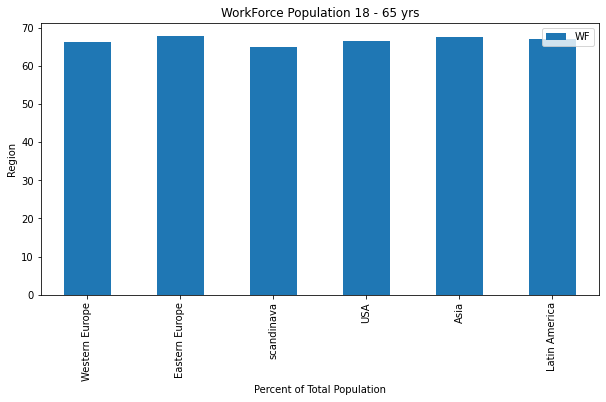

In [18]:
chart.plot(kind='bar',figsize=(10,5))
plt.title('WorkForce Population 18 - 65 yrs')
plt.xlabel('Percent of Total Population')
plt.ylabel('Region')